<a href="https://colab.research.google.com/github/JennaKvasnovsky/Fall2023/blob/main/Python_HTML_Filters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import IPython
# IPython.display.HTML(filename='/path/to/your/filename')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import base64
from io import BytesIO

# Convert the matplotlib plot to a base64 encoded image
def plot_to_base64():
    buf = BytesIO()
    plt.savefig(buf, format="png", bbox_inches='tight')
    plt.close()
    return base64.b64encode(buf.getvalue()).decode('utf-8')

def plot(x, y, title=None):
    fig, ax = plt.subplots()
    ax.plot(x, y)
    ax.axis('off')
    fig.set_size_inches(7, 7)
    plt.title(title)

html_content = "<html><body>"

x = np.linspace(0, 4 * np.pi, 1000)
frequencies = [1, 2, 3, 4]

for freq in frequencies:
    y_sin = np.sin(freq * x)
    y_cos = np.cos(freq * x)

    title = f"Sine and Cosine for frequency: {freq}"
    plot(x, y_sin, title)
    img_b64 = plot_to_base64()
    html_content += f"<h3>{title}</h3>"
    html_content += f'<img src="data:image/png;base64,{img_b64}" alt="{title}" />'

    plot(x, y_cos, title)
    img_b64 = plot_to_base64()
    html_content += f'<img src="data:image/png;base64,{img_b64}" alt="{title}" />'

html_content += "</body></html>"
print(html_content, file=open("sine_cosine_output.html",'w'))


In [ ]:
IPython.display.HTML(filename='sine_cosine_output.html')

In [ ]:
def scatter_plot(x, y, title=None):
    fig, ax = plt.subplots()
    ax.scatter(x, y, color='blue', s=10)
    ax.axis('off')
    fig.set_size_inches(7, 7)
    plt.title(title)

html_content = "<html><body>"

for i in range(3):
    x = np.random.rand(100)
    y = np.random.rand(100)

    title = f"Scatter plot {i+1}"
    scatter_plot(x, y, title)
    img_b64 = plot_to_base64()
    html_content += f"<h3>{title}</h3>"
    html_content += f'<img src="data:image/png;base64,{img_b64}" alt="{title}" />'

html_content += "</body></html>"
print(html_content, file=open("scatter_output.html",'w'))


In [ ]:
IPython.display.HTML(filename='scatter_output.html')

In [ ]:
def histogram(x, title=None):
    fig, ax = plt.subplots()
    ax.hist(x, bins=30, color='green', alpha=0.7)
    ax.axis('off')
    fig.set_size_inches(7, 7)
    plt.title(title)

html_content = "<html><body>"

for i in range(3):
    x = np.random.randn(1000) + i*2 # Shifting mean

    title = f"Histogram {i+1}"
    histogram(x, title)
    img_b64 = plot_to_base64()
    html_content += f"<h3>{title}</h3>"
    html_content += f'<img src="data:image/png;base64,{img_b64}" alt="{title}" />'

html_content += "</body></html>"
print(html_content, file=open("histogram_output.html",'w'))



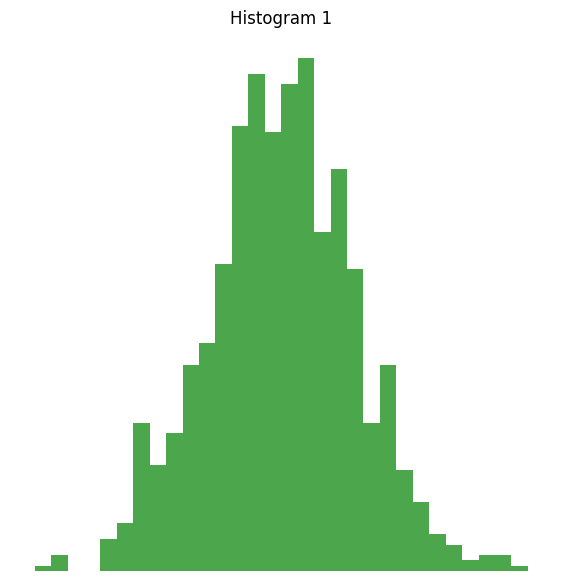
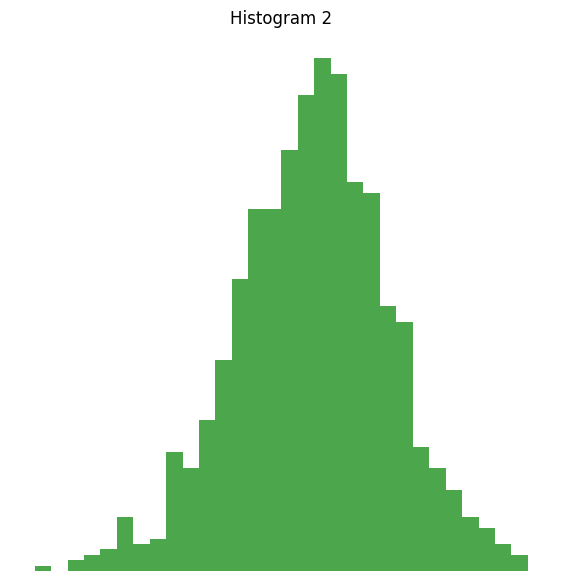
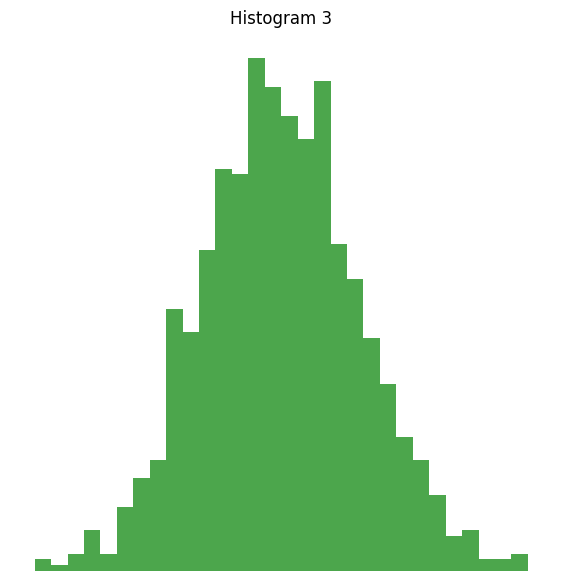

In [ ]:
IPython.display.HTML(filename='histogram_output.html')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import base64
from io import BytesIO
from scipy.signal import convolve2d
from skimage import data, color

# Function to convert a plot to a base64 encoded image
def plot_to_base64():
    buf = BytesIO()
    plt.savefig(buf, format="png", bbox_inches='tight')
    plt.close()
    return base64.b64encode(buf.getvalue()).decode('utf-8')

# Load and display the original image
image = data.camera()

# Define convolution kernels
kernels = {
    'Identity': np.array([[0, 0, 0],
                          [0, 1, 0],
                          [0, 0, 0]]),

    'Edge Detection': np.array([[-1, -1, -1],
                                [-1,  8, -1],
                                [-1, -1, -1]]),

    'Blur': np.array([[1, 1, 1],
                      [1, 1, 1],
                      [1, 1, 1]]) / 9,

    'Sharpen': np.array([[ 0, -1,  0],
                         [-1,  5, -1],
                         [ 0, -1,  0]])
}

# Function to apply convolution
def apply_convolution(image, kernel):
    return convolve2d(image, kernel, mode='same', boundary='symm')

# Create HTML content
html_content = "<html><body>"

# Display original image
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')
img_b64 = plot_to_base64()
html_content += f"<h3>Original Image</h3>"
html_content += f'<img src="data:image/png;base64,{img_b64}" alt="Original Image" />'

# Apply each convolution kernel and display the result
for name, kernel in kernels.items():
    convoluted_image = apply_convolution(image, kernel)

    plt.imshow(convoluted_image, cmap='gray')
    plt.title(name)
    plt.axis('off')
    img_b64 = plot_to_base64()

    html_content += f"<h3>{name}</h3>"
    html_content += f'<img src="data:image/png;base64,{img_b64}" alt="{name}" />'

html_content += "</body></html>"

# Save the HTML content to a file
print(html_content, file=open("convolution_demo.html",'w'))



In [ ]:
IPython.display.HTML(filename='convolution_demo.html')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import base64
from io import BytesIO
from scipy.signal import convolve2d
from skimage import data

# Function to convert a plot to a base64 encoded image
def plot_to_base64():
    buf = BytesIO()
    plt.savefig(buf, format="png", bbox_inches='tight')
    plt.close()
    return base64.b64encode(buf.getvalue()).decode('utf-8')

# Load the original image
image = data.astronaut()

# Define RGB convolution kernels
kernels = {
    'Red Channel': np.array([[[0, 0, 0], [0, 0, 0], [0, 0, 0]],
                             [[0, 0, 0], [1, 0, 0], [0, 0, 0]],
                             [[0, 0, 0], [0, 0, 0], [0, 0, 0]]]),

    'Green Channel': np.array([[[0, 0, 0], [0, 0, 0], [0, 0, 0]],
                               [[0, 0, 0], [0, 1, 0], [0, 0, 0]],
                               [[0, 0, 0], [0, 0, 0], [0, 0, 0]]]),

    'Blue Channel': np.array([[[0, 0, 0], [0, 0, 0], [0, 0, 0]],
                              [[0, 0, 0], [0, 0, 1], [0, 0, 0]],
                              [[0, 0, 0], [0, 0, 0], [0, 0, 0]]])
}

# Function to apply RGB convolution
def apply_rgb_convolution(image, kernel):
    red = convolve2d(image[:,:,0], kernel[:,:,0], mode='same', boundary='symm')
    green = convolve2d(image[:,:,1], kernel[:,:,1], mode='same', boundary='symm')
    blue = convolve2d(image[:,:,2], kernel[:,:,2], mode='same', boundary='symm')
    return np.stack([red, green, blue], axis=2)

# Create HTML content
html_content = "<html><body>"

# Display original image
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')
img_b64 = plot_to_base64()
html_content += f"<h3>Original Image</h3>"
html_content += f'<img src="data:image/png;base64,{img_b64}" alt="Original Image" />'

# Apply each convolution kernel and display the result
for name, kernel in kernels.items():
    convoluted_image = apply_rgb_convolution(image, kernel)

    plt.imshow(255*kernel)
    plt.title(name)
    plt.axis('off')
    img_b64 = plot_to_base64()

    html_content += f"<h3>{name}</h3>"
    html_content += f'<img src="data:image/png;base64,{img_b64}" alt="{name}" />'

    plt.imshow(convoluted_image)
    plt.title(name)
    plt.axis('off')
    img_b64 = plot_to_base64()

    html_content += f"<h3>{name}</h3>"
    html_content += f'<img src="data:image/png;base64,{img_b64}" alt="{name}" />'

html_content += "</body></html>"

# Save the HTML content to a file using the preferred format
print(html_content, file=open("rgb_separation_demo.html",'w'))

IPython.display.HTML(filename='rgb_separation_demo.html')


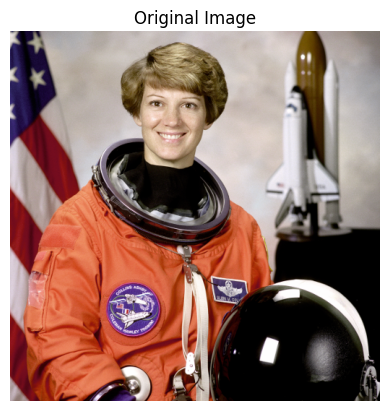
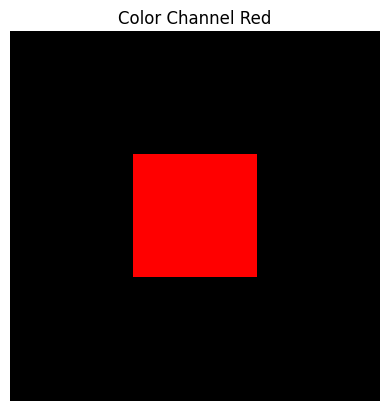
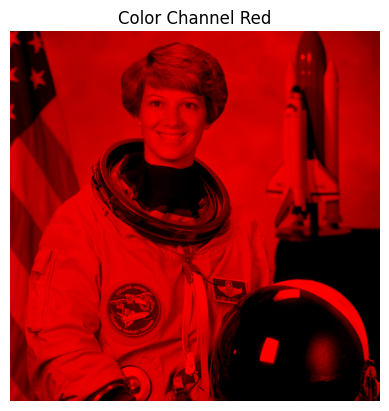
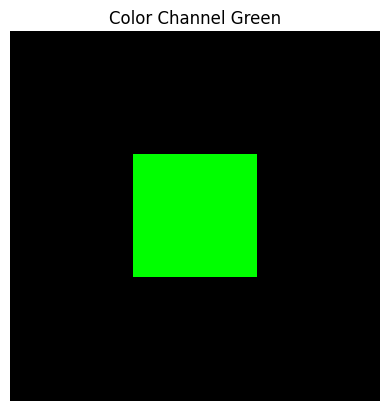
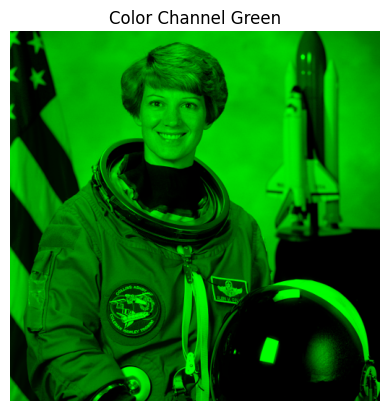
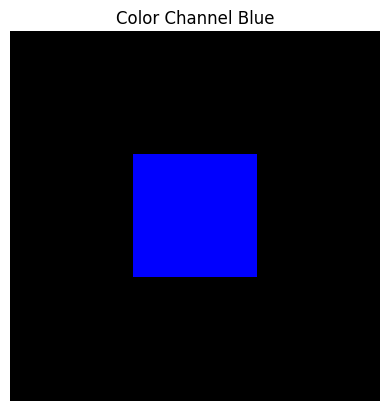
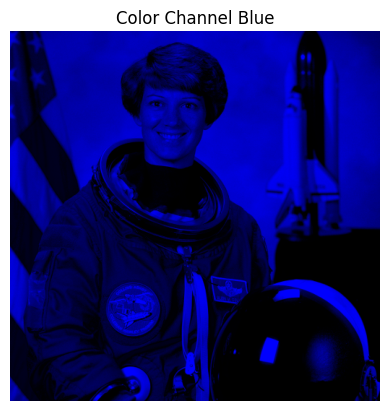
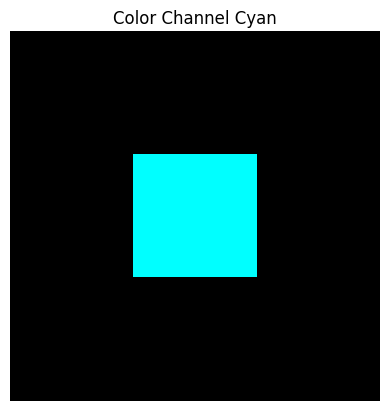
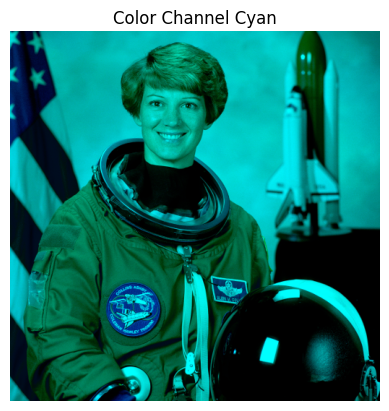
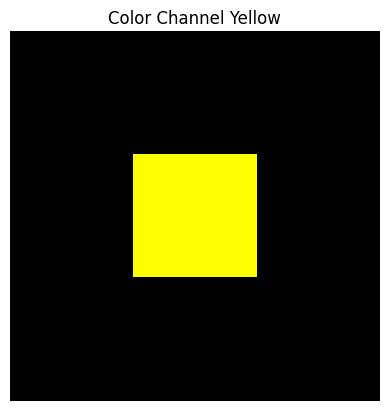
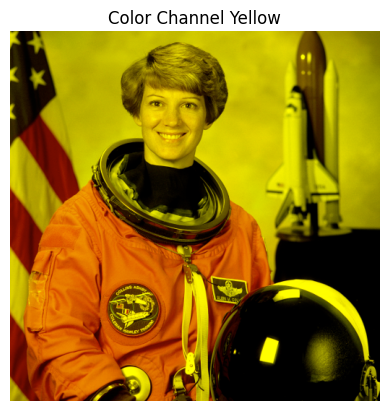
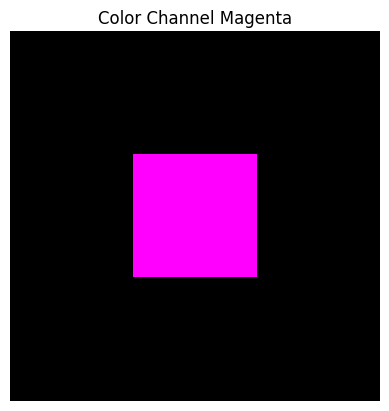
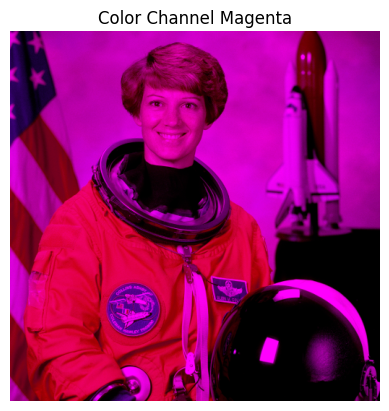

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import base64
from io import BytesIO
from scipy.signal import convolve2d
from skimage import data

# Function to convert a plot to a base64 encoded image
def plot_to_base64():
    buf = BytesIO()
    plt.savefig(buf, format="png", bbox_inches='tight')
    plt.close()
    return base64.b64encode(buf.getvalue()).decode('utf-8')

# Load the original image
image = data.astronaut()

# Define RGB convolution kernels
kernels = {
    'Color Channel Red': np.array([[[0, 0, 0], [0, 0, 0], [0, 0, 0]],
                                   [[0, 0, 0], [1, 0, 0], [0, 0, 0]],
                                   [[0, 0, 0], [0, 0, 0], [0, 0, 0]]]),

    'Color Channel Green': np.array([[[0, 0, 0], [0, 0, 0], [0, 0, 0]],
                                     [[0, 0, 0], [0, 1, 0], [0, 0, 0]],
                                     [[0, 0, 0], [0, 0, 0], [0, 0, 0]]]),

    'Color Channel Blue': np.array([[[0, 0, 0], [0, 0, 0], [0, 0, 0]],
                                    [[0, 0, 0], [0, 0, 1], [0, 0, 0]],
                                    [[0, 0, 0], [0, 0, 0], [0, 0, 0]]]),

    'Color Channel Cyan': np.array([[[0, 0, 0], [0, 0, 0], [0, 0, 0]],
                                    [[0, 0, 0], [0, 1, 1], [0, 0, 0]],
                                    [[0, 0, 0], [0, 0, 0], [0, 0, 0]]]),

    'Color Channel Yellow': np.array([[[0, 0, 0], [0, 0, 0], [0, 0, 0]],
                                       [[0, 0, 0], [1, 1, 0], [0, 0, 0]],
                                       [[0, 0, 0], [0, 0, 0], [0, 0, 0]]]),

    'Color Channel Magenta': np.array([[[0, 0, 0], [0, 0, 0], [0, 0, 0]],
                                      [[0, 0, 0], [1, 0, 1], [0, 0, 0]],
                                      [[0, 0, 0], [0, 0, 0], [0, 0, 0]]])
}


# Function to apply RGB convolution
def apply_rgb_convolution(image, kernel):
    red = convolve2d(image[:,:,0], kernel[:,:,0], mode='same', boundary='symm')
    green = convolve2d(image[:,:,1], kernel[:,:,1], mode='same', boundary='symm')
    blue = convolve2d(image[:,:,2], kernel[:,:,2], mode='same', boundary='symm')
    return np.stack([red, green, blue], axis=2)

# Create HTML content
html_content = "<html><body>"

# Display original image
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')
img_b64 = plot_to_base64()
html_content += f"<h3>Original Image</h3>"
html_content += f'<img src="data:image/png;base64,{img_b64}" alt="Original Image" />'

# Apply each convolution kernel and display the result
for name, kernel in kernels.items():
    convoluted_image = apply_rgb_convolution(image, kernel)

    plt.imshow(255*kernel)
    plt.title(name)
    plt.axis('off')
    img_b64 = plot_to_base64()

    html_content += f"<h3>{name}</h3>"
    html_content += f'<img src="data:image/png;base64,{img_b64}" alt="{name}" />'

    plt.imshow(convoluted_image)
    plt.title(name)
    plt.axis('off')
    img_b64 = plot_to_base64()

    html_content += f"<h3>{name}</h3>"
    html_content += f'<img src="data:image/png;base64,{img_b64}" alt="{name}" />'

html_content += "</body></html>"

# Save the HTML content to a file using the preferred format
print(html_content, file=open("rgb_separation_demo.html",'w'))

IPython.display.HTML(filename='rgb_separation_demo.html')

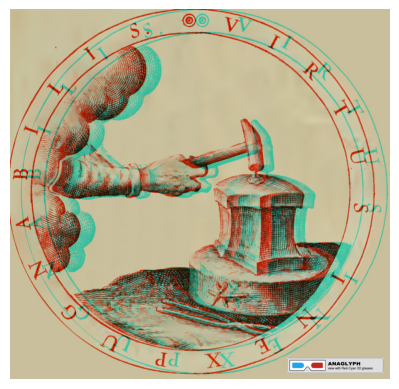

In [ ]:
import requests
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

# Load image from URL
url = "https://upload.wikimedia.org/wikipedia/commons/0/0a/Hammer_anaglyph_%2814656149338%29.jpg"
image = io.imread(url)

# Display the image
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()



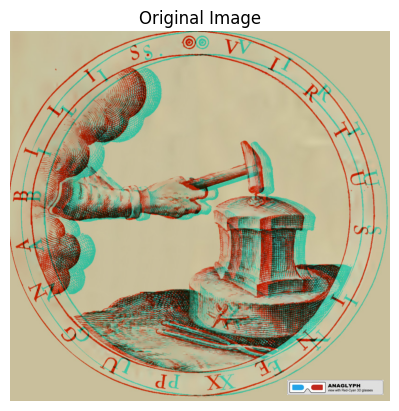
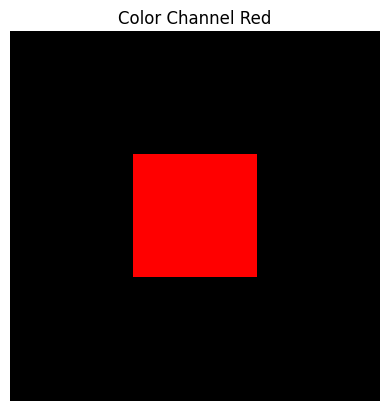
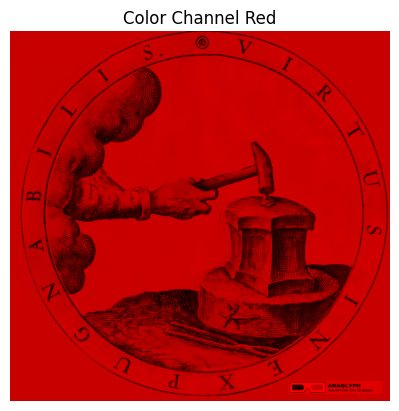
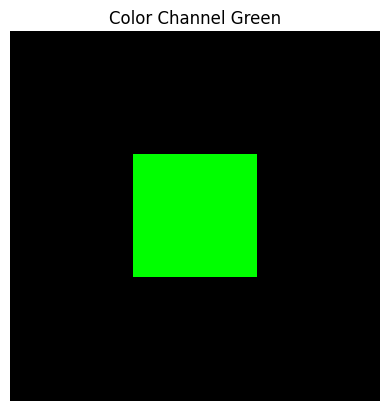
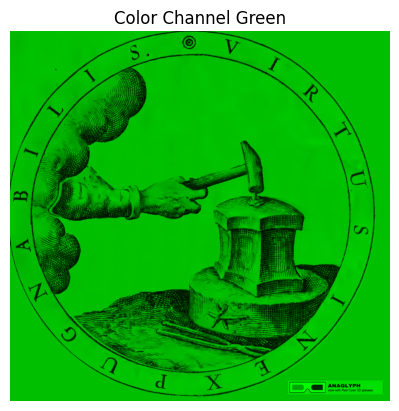
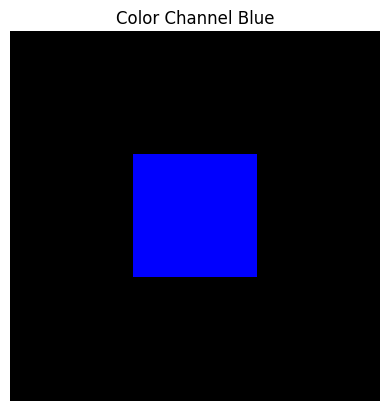
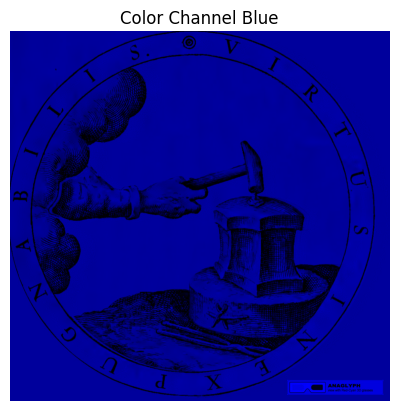
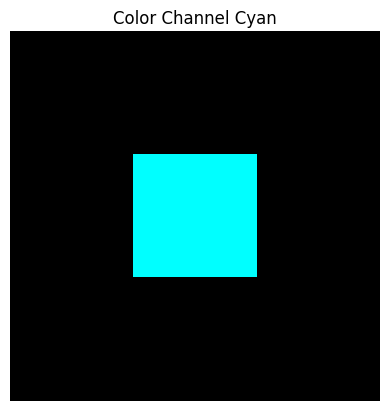
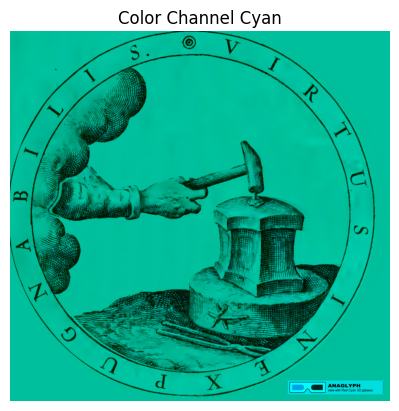
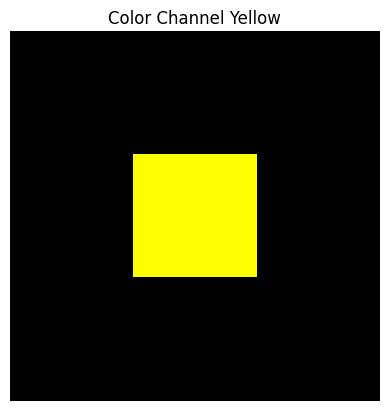
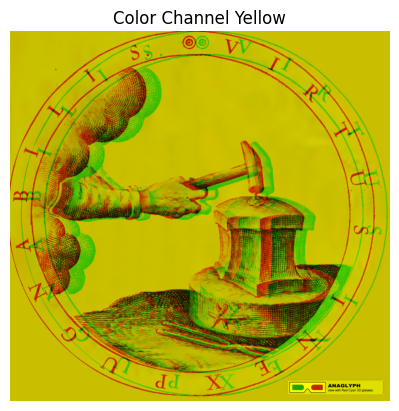
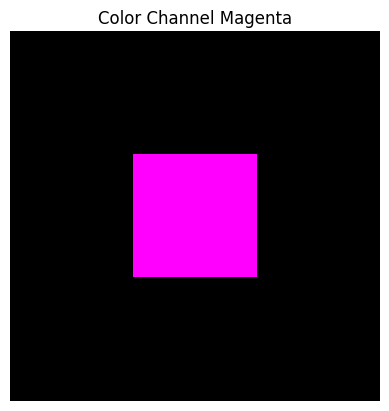
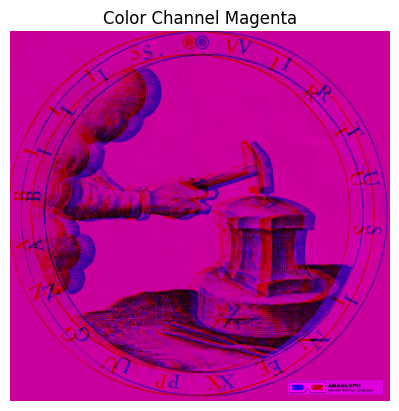

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import base64
from io import BytesIO
from scipy.signal import convolve2d
from skimage import data

# Function to convert a plot to a base64 encoded image
def plot_to_base64():
    buf = BytesIO()
    plt.savefig(buf, format="png", bbox_inches='tight')
    plt.close()
    return base64.b64encode(buf.getvalue()).decode('utf-8')


# Define RGB convolution kernels
kernels = {
    'Color Channel Red': np.array([[[0, 0, 0], [0, 0, 0], [0, 0, 0]],
                                   [[0, 0, 0], [1, 0, 0], [0, 0, 0]],
                                   [[0, 0, 0], [0, 0, 0], [0, 0, 0]]]),

    'Color Channel Green': np.array([[[0, 0, 0], [0, 0, 0], [0, 0, 0]],
                                     [[0, 0, 0], [0, 1, 0], [0, 0, 0]],
                                     [[0, 0, 0], [0, 0, 0], [0, 0, 0]]]),

    'Color Channel Blue': np.array([[[0, 0, 0], [0, 0, 0], [0, 0, 0]],
                                    [[0, 0, 0], [0, 0, 1], [0, 0, 0]],
                                    [[0, 0, 0], [0, 0, 0], [0, 0, 0]]]),

    'Color Channel Cyan': np.array([[[0, 0, 0], [0, 0, 0], [0, 0, 0]],
                                    [[0, 0, 0], [0, 1, 1], [0, 0, 0]],
                                    [[0, 0, 0], [0, 0, 0], [0, 0, 0]]]),

    'Color Channel Yellow': np.array([[[0, 0, 0], [0, 0, 0], [0, 0, 0]],
                                       [[0, 0, 0], [1, 1, 0], [0, 0, 0]],
                                       [[0, 0, 0], [0, 0, 0], [0, 0, 0]]]),

    'Color Channel Magenta': np.array([[[0, 0, 0], [0, 0, 0], [0, 0, 0]],
                                      [[0, 0, 0], [1, 0, 1], [0, 0, 0]],
                                      [[0, 0, 0], [0, 0, 0], [0, 0, 0]]])
}


# Function to apply RGB convolution
def apply_rgb_convolution(image, kernel):
    red = convolve2d(image[:,:,0], kernel[:,:,0], mode='same', boundary='symm')
    green = convolve2d(image[:,:,1], kernel[:,:,1], mode='same', boundary='symm')
    blue = convolve2d(image[:,:,2], kernel[:,:,2], mode='same', boundary='symm')
    return np.stack([red, green, blue], axis=2)

# Create HTML content
html_content = "<html><body>"

# Display original image
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')
img_b64 = plot_to_base64()
html_content += f"<h3>Original Image</h3>"
html_content += f'<img src="data:image/png;base64,{img_b64}" alt="Original Image" />'

# Apply each convolution kernel and display the result
for name, kernel in kernels.items():
    convoluted_image = apply_rgb_convolution(image, kernel)

    plt.imshow(255*kernel)
    plt.title(name)
    plt.axis('off')
    img_b64 = plot_to_base64()

    html_content += f"<h3>{name}</h3>"
    html_content += f'<img src="data:image/png;base64,{img_b64}" alt="{name}" />'

    plt.imshow(convoluted_image)
    plt.title(name)
    plt.axis('off')
    img_b64 = plot_to_base64()

    html_content += f"<h3>{name}</h3>"
    html_content += f'<img src="data:image/png;base64,{img_b64}" alt="{name}" />'

html_content += "</body></html>"

# Save the HTML content to a file using the preferred format
print(html_content, file=open("rgb_separation_demo.html",'w'))

IPython.display.HTML(filename='rgb_separation_demo.html')

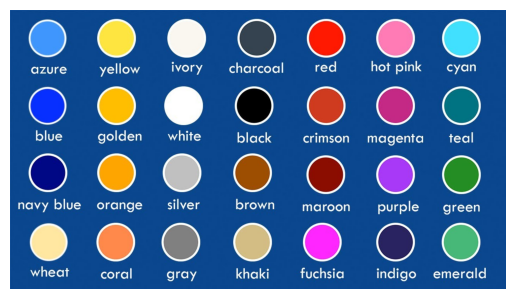

In [ ]:
# Load image from URL
url = "https://i.ytimg.com/vi/01AWUd1ySZs/maxresdefault.jpg"
image = io.imread(url)

# Display the image
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()


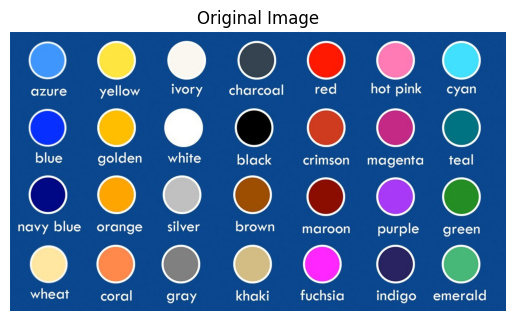
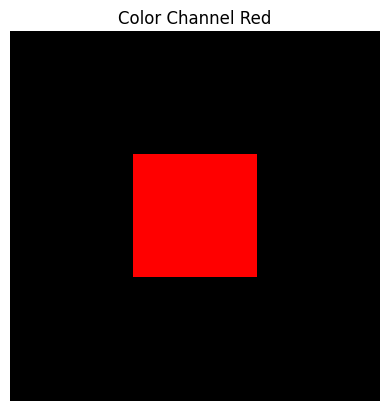
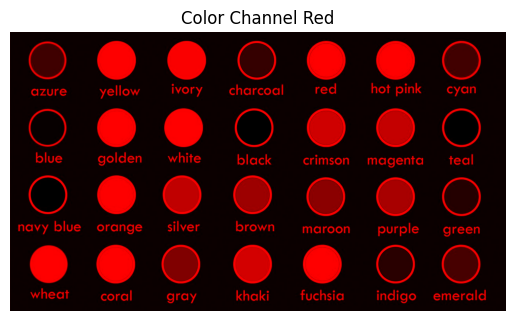
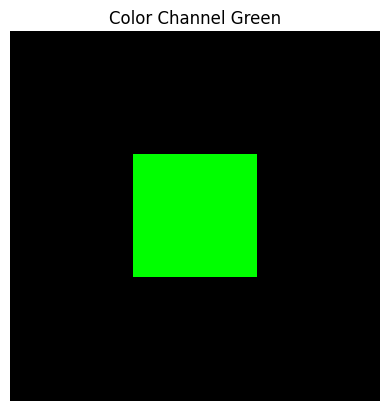
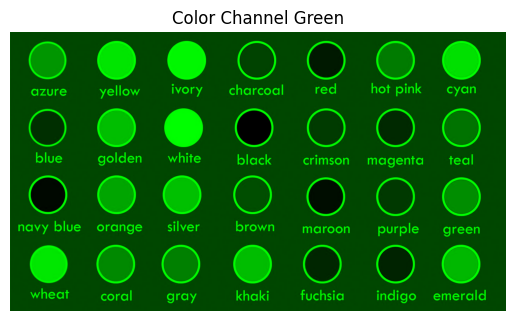
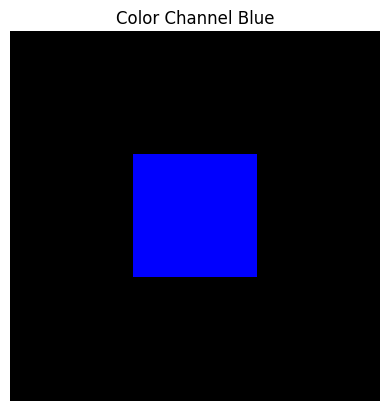
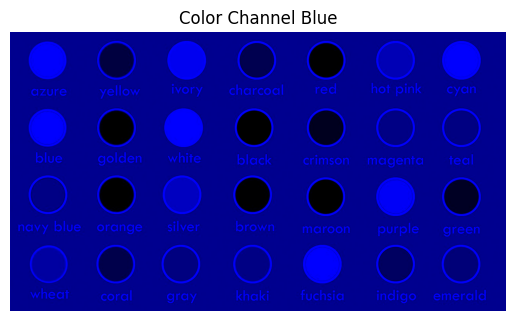
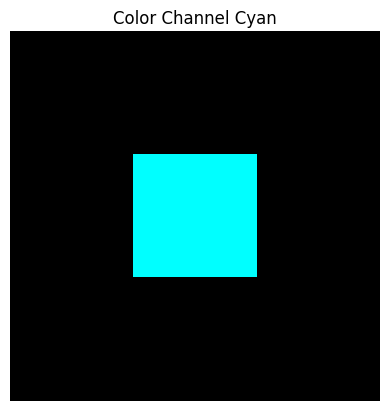
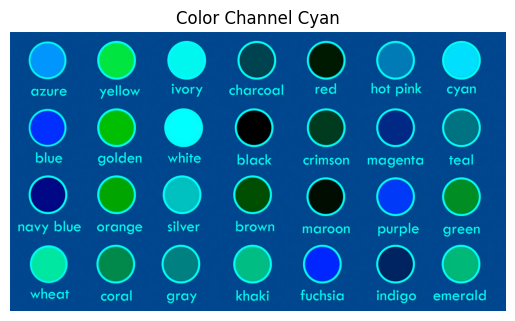
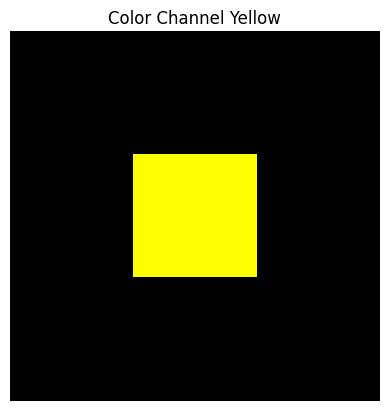
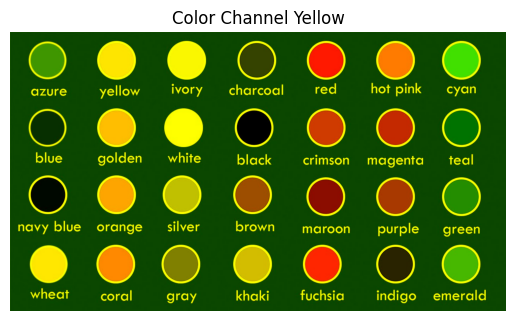
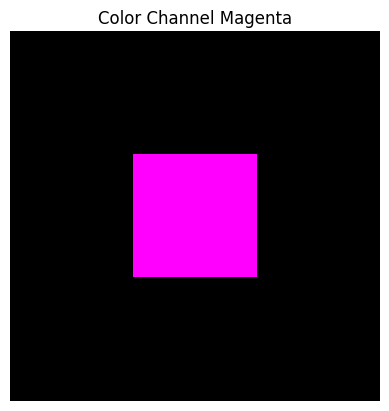
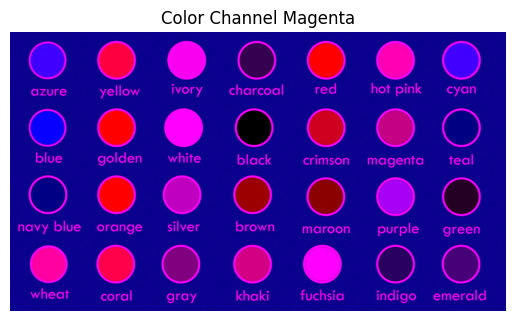

In [ ]:
# Create HTML content
html_content = "<html><body>"

# Display original image
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')
img_b64 = plot_to_base64()
html_content += f"<h3>Original Image</h3>"
html_content += f'<img src="data:image/png;base64,{img_b64}" alt="Original Image" />'

# Apply each convolution kernel and display the result
for name, kernel in kernels.items():
    convoluted_image = apply_rgb_convolution(image, kernel)

    plt.imshow(255*kernel)
    plt.title(name)
    plt.axis('off')
    img_b64 = plot_to_base64()

    html_content += f"<h3>{name}</h3>"
    html_content += f'<img src="data:image/png;base64,{img_b64}" alt="{name}" />'

    plt.imshow(convoluted_image)
    plt.title(name)
    plt.axis('off')
    img_b64 = plot_to_base64()

    html_content += f"<h3>{name}</h3>"
    html_content += f'<img src="data:image/png;base64,{img_b64}" alt="{name}" />'

html_content += "</body></html>"

# Save the HTML content to a file using the preferred format
print(html_content, file=open("rgb_separation_demo.html",'w'))

IPython.display.HTML(filename='rgb_separation_demo.html')